In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
SE_size_factor = 0.02
lam_factor = 3
area_factor = 0.001
connectivity = 8

area_factor_large = 0.001
area_factor_very_large = 0.01
weight_all = 0.33
weight_large = 0.33
weight_very_large = 0.33
offset = 80
stepsize = 1

lam=24

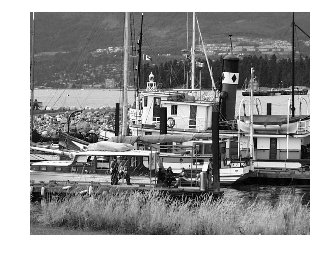

In [4]:
#Load the image
path_to_image = '../tests/images/Gray/Gray_scale.png'
#path_to_image = '../tests/images/Gray/Binarization_data_driven.png'
img = cv2.imread(path_to_image)
sr.show_image(img)

In [5]:
binarizer = sr.DatadrivenBinarizer( lam=lam,
                 area_factor_large=area_factor_large,
                 area_factor_verylarge=area_factor_very_large,
                 weights=(weight_all, weight_large, weight_very_large),
                 offset=offset,
                 stepsize=stepsize,
                 connectivity=connectivity)

#for now: use simple threshold binarizer
#binarizer = sr.ThresholdBinarizer(142)

In [6]:
#our detection object
det = sr.SalientDetector(binarizer=binarizer, 
                         SE_size_factor=SE_size_factor, 
                         area_factor=area_factor,
                         lam_factor=lam_factor, 
                         connectivity=connectivity)


In [7]:
area = img.shape[0] * img.shape[1]
SE2, lam2 = det.get_SE(area)
print(area)
print(lam2, SE2.shape)
print(lam_factor*np.floor(SE_size_factor*np.sqrt(area/np.pi)))

578000
(24, (15, 15))
24.0


(24, (15, 15))


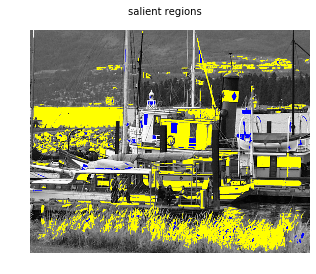

In [8]:
regions = det.detect(img,
                    find_holes=True,
                    find_islands=True,
                    find_indentations=False,
                    find_protrusions=False, 
                    visualize=False)
#assert det.lam == lam
print(det.lam, det.SE.shape) #, lam
sr.visualize_elements(img, regions=regions);

{'islands': 226, 'holes': 76}


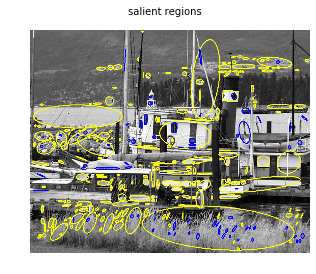

In [9]:
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, 
                                                                                connectivity=connectivity)
print(num_regions)
sr.visualize_elements_ellipses(img, features_standard);

{'indentations': 175, 'islands': 226, 'holes': 76, 'protrusions': 172}


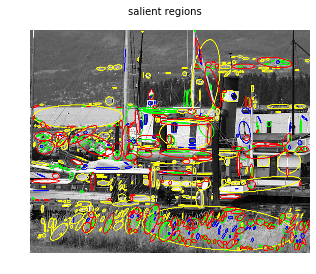

In [10]:
matfile = sio.loadmat('../tests/features/Gray/Gray_scale_dmsrallregions.mat')
masks = matfile['saliency_masks'] * 255
holes_true = masks[:,:, 0]
islands_true = masks[:,:, 1]
indents_true = masks[:,:, 2]
prots_true =  masks[:,:, 3]
regions_dmsr = {"holes": holes_true, "islands": islands_true, "indentations":indents_true, "protrusions": prots_true}
#sr.visualize_elements(img, regions_dmsra);
num_regions_dmsr, features_standard_dmsr, features_poly_dmsr = sr.binary_mask2ellipse_features(regions_dmsr, 
                                                                                connectivity=connectivity)
print(num_regions_dmsr)
sr.visualize_elements_ellipses(img, features_standard_dmsr);

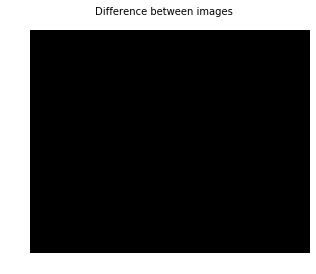

True


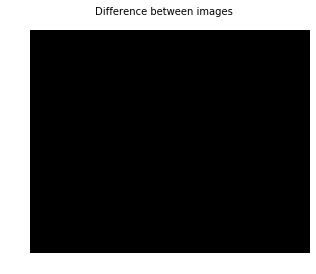

True


In [11]:
print(sr.image_diff(regions['holes'], holes_true))
print(sr.image_diff(regions['islands'], islands_true))